<a href="https://colab.research.google.com/github/Creatrohit9/AIRBNB-PROJECT-1-CAPSTON/blob/main/airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>


Thus begins my journey through heaps and heaps(49,000 rows)  of observational data.
My goal is to draw some meaningful insights,crunch some numbers and give credible advise to the CEO of AirBNB about how he can make his company more efficient and profitable.

SO!  are you excited??
I surely am!
lets start....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Naveen/Capstone-1 DATA/Airbnb NYC 2019.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

So our first step is cleaning the data and checking its sanity,by carefully observing the columns and ascertaining their meaning we can decide which columns to keep for our analysis and which columns to drop as they make little sense in our analysis.

Here I have decided to do away with 'id' ,'host_id' & 'last review'.

In [ ]:
columns_to_keep=['host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [ ]:
#Creating a subset datframe by keeping the selected columns
new_df=df[columns_to_keep]

In [ ]:
#This would be our data set which we would be working with throughout.
new_df

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Hey! I can see that  the minimum price mentioned is 0,what? is that really possible. I don't think so!

Need to do something about it!


In [ ]:
new_df.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


So after doing some background research and going through the official 
AirBNB website, I came to observe that the minimum and maximum price in New York of an AirBNB is 20 and 8000 USD respectively.

So here I am going to limit my data in between these values only.
Those values which are out of this range, I will replace them by the median price.


In [ ]:
#Method for dealing with extreme data points in price column.

def replace_extreme_values(price):
  if price<20 or price>8000:
    price=106   # Median Price
    

  else:
    price=price

  return(price)  

In [ ]:
new_df['price']=new_df['price'].apply(replace_extreme_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now this looks better.
We have also not lost any data yet.
I chose not to drop these outlier data points as it could lead to loss of data,which could hamper  the accuracy of our calculations.
Now ...Lets move further....

In [ ]:
new_df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,151.440536,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,210.545389,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,8000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Handling null values in reviews per month column
new_df.fillna(value={'reviews_per_month':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#Handling missing host name values in column 'Host Name
new_df.fillna(value={'host_name':'Host Name Missing in Provided Data'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


So,this looks perfect!
We have handled all the null values in all our columns.
We took care of the extreme values in the 'price' column.
Data is symmetric ,clean and sane now.
We can start our magic  :D

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       48895 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [ ]:
new_df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,151.440536,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,210.545389,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,8000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Creating a copy of our data frame just in case needed.
new_df1=new_df.copy()

In [ ]:
new_df.head(10)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


So, lets see if there is a relationship between a room type and minimum nights needed for booking that particular room type.

In [ ]:
#Room_type Minimum_night Relation

room_type_minimum_night_relation_df=new_df.groupby('room_type')['minimum_nights'].mean().reset_index()

In [ ]:
room_type_minimum_night_relation_df

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


This evidently means that an host of an Entire home/apt expects its guest to stay for atleast a week.

Text(0, 0.5, 'Minimum Nights')

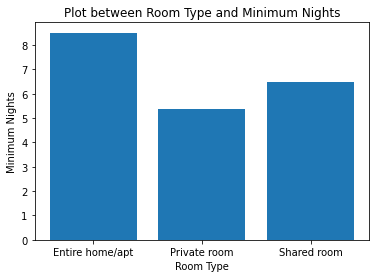

In [ ]:
x=room_type_minimum_night_relation_df.room_type
y=room_type_minimum_night_relation_df.minimum_nights
plt.bar(x,y)

plt.title('Plot between Room Type and Minimum Nights')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')


In [ ]:
#Finding the costliest neighbourhood group in all the room type categories.

costliest_neighbourhood_group_room_type=new_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

In [ ]:
costliest_neighbourhood_group_room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,67.098160,59.800000
Brooklyn,177.353489,76.608962,52.116223
Manhattan,246.411925,115.607617,89.377083
Queens,147.228531,68.856762,71.767677
Staten Island,173.846591,62.292553,67.777778


This is quite an interesting piece of data.
As we can see from the below graph, Manhattan has the most expensive AirBNB's across all the room types.
The reason for this could be that Manhattan is right in the center of the city,very densely populated and is a very important financial center just like 
our very own Aamchi Mumbai! 



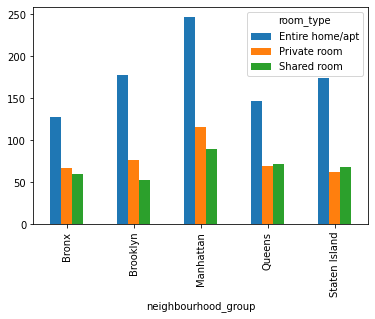

In [ ]:
costliest_neighbourhood_group_room_type.plot(kind='bar')


In [ ]:
#Room_types in each neighbourhood group.
neighbourhoods_group_by_room_type_df=new_df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()

In [ ]:
neighbourhoods_group_by_room_type_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


We can see shared rooms are the least popular choice amongst travellers, as it is possible most of them prefer privacy over anything else.
This is could be the same reason that home/apt and private rooms continue to lead as the most preferred rooms types across all the neighbourhood groups.

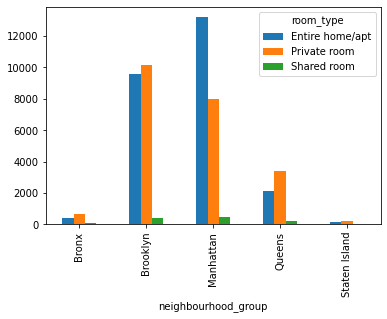

In [ ]:
neighbourhoods_group_by_room_type_df.plot(kind='bar')


Now,let's see which neighbourhood group receives the most footfall(traffic) in it's AirBNB's and does this have any correlation with the price ?

In [ ]:
busiest_neighbourhood_groups=new_df.groupby(['neighbourhood_group'])['reviews_per_month'].mean().reset_index()



In [ ]:
busiest_neighbourhood_groups

,neighbourhood_group,reviews_per_month
0,Bronx,1.475655
1,Brooklyn,1.049790
2,Manhattan,0.976782
3,Queens,1.567076
4,Staten Island,1.576381


Queens and Staten Island are the busiest neighbourhood groups, the reason could be the average prices of their AirBNB's are lowest when compared to other groups.
Here we can see a simple law of Economics being obeyed here.
The law of Demand and Supply.
Low prices  means High demand(High demand for Queens and Staten Island)
High prices means Low demand(Low demand for Manhattan)

Text(0, 0.5, 'Reviews per Month')

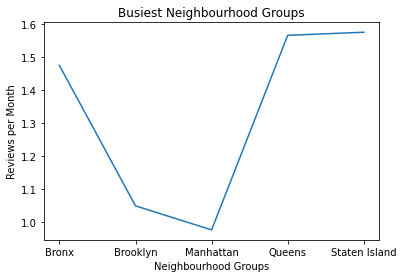

In [ ]:
x=busiest_neighbourhood_groups.neighbourhood_group
y=busiest_neighbourhood_groups.reviews_per_month
plt.plot(x,y)

plt.title('Busiest Neighbourhood Groups')
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Reviews per Month')

In [ ]:
#Plotting a co-relation heat map between demand(reviews_per_month & price)
nbh_grp_mean_price_traffic_relation_df=new_df.groupby('neighbourhood_group')['reviews_per_month','price'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
nbh_grp_mean_price_traffic_relation_df

,reviews_per_month,price
neighbourhood_group,,
Bronx,1.475655,87.681943
Brooklyn,1.049790,124.007561
Manhattan,0.976782,194.731176
Queens,1.567076,97.950229
Staten Island,1.576381,115.061662


The below heat map proves the law of demand and supply which we know in economics
Here ,reviews per-month which also means the traffic a particular neighbourhood group receives is nothing but the demand in this case.

As we can observe from below,the demand(reviews_per_month) and the price are in negative co-relation with each other.
This is the reason reviews per month(demand) is the lowest in Manhattan beacuse of its high priced Air BNB's.

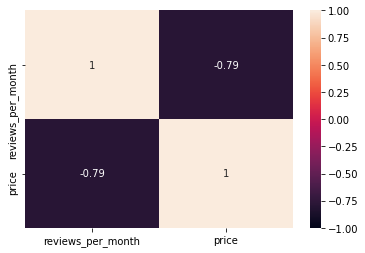

In [ ]:
sns.heatmap(nbh_grp_mean_price_traffic_relation_df.corr(),vmin=-1,annot=True)

In [ ]:
#To see any pattern(if exists) between room type and availability of that room_type.
room_type_availability_relation=new_df.groupby('room_type')['availability_365'].mean().reset_index()

In [ ]:
room_type_availability_relation

,room_type,availability_365
0,Entire home/apt,111.920304
1,Private room,111.203933
2,Shared room,162.000862


It can be said that just like in India,people who have opened OYO's at their homes(i.e. an extra floor,an extra room) for an extra source of income are no different.
The case is very much similar in USA,the home/apt room type is available usually for 100 days in an year,which means that the host/owner of that particular Air BNB uses it for his own personal use and uses it as an income generating source when it's not in use,just like in India.

Hence we can say that the Air BNB's in NYC are not fully owned  professional hotels but a mix of retail properties owned by individuals who are interested in gaining some value from their home/apts when it's not in use.


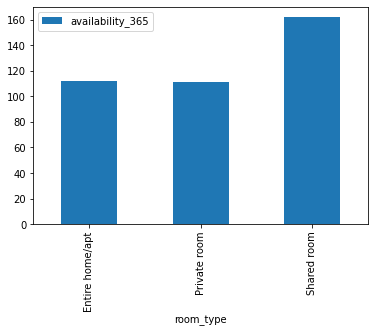

In [ ]:
room_type_availability_relation.plot(x='room_type',y='availability_365',kind='bar')

Now,lets see if there is any relationship between number of reviews an AirBNB receives and its price.


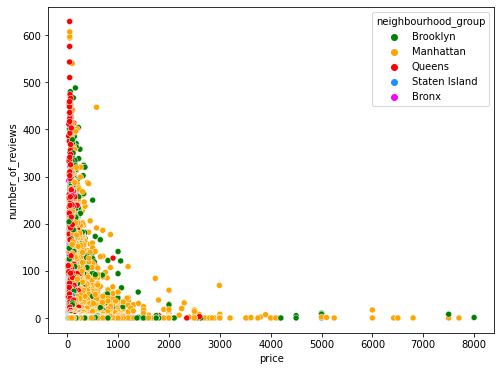

In [ ]:
plt.figure(figsize=(8,6))
p=sns.scatterplot(x='price',y='number_of_reviews',hue='neighbourhood_group',palette=['green','orange','red','dodgerblue','magenta'],legend='full',data=new_df)

In [ ]:
price_review_per_month_relation_df=new_df[['price','reviews_per_month']]

In [ ]:
price_review_per_month_relation_df

,price,reviews_per_month
0,149,0.21
1,225,0.38
2,150,0.00
3,89,4.64
4,80,0.10
...,...,...
48890,70,0.00
48891,40,0.00
48892,115,0.00
48893,55,0.00


They follow a -ve co-relation,high prices corresponds to low traffic as already proven earlier.


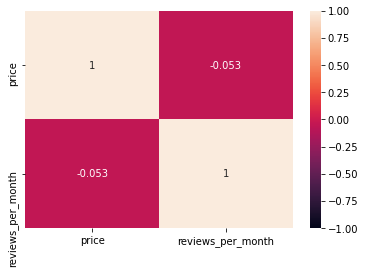

In [ ]:
sns.heatmap(price_review_per_month_relation_df.corr(),vmin=-1,annot=True)

Now let's dive deeper into the data particularly the hosts with most listings,this will help us throw some light on which hosts have been successfull in opening more AirBNB's under their name.

In [ ]:
host_name_host_listings_count_df=new_df[['host_name','calculated_host_listings_count']]

In [ ]:
sorted_host_name_host_listings_count_df=host_name_host_listings_count_df.sort_values('calculated_host_listings_count',ascending=False)

In [ ]:
top_three_host_listing_counts=sorted_host_name_host_listings_count_df.drop_duplicates(subset=['host_name','calculated_host_listings_count'],keep='first')

In [ ]:
data=top_three_host_listing_counts[0:3]
data

So here we get the top 3 hosts by their host listings count.
Sonders has a total of 327 Air BNB properties unders its name!
Quite interesting,lets explore more about this Host! Sonders!

Text(0, 0.5, 'Host Name')

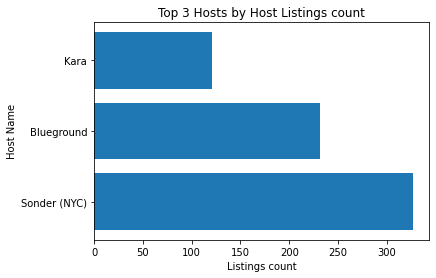

In [ ]:
x=data.host_name
y=data.calculated_host_listings_count
plt.barh(x,y)
plt.title('Top 3 Hosts by Host Listings count')
plt.xlabel('Listings count')
plt.ylabel('Host Name')

In [ ]:
sonder_df=new_df.loc[new_df['host_name']=='Sonder (NYC)']

So we did some background research about Sonder and we came to know that Sonder is a hotel chain company which uses Air BNB for listing its properties.
It's hotels are mainly based in Manhattan,mostly in the below seven districts of Manhattan, they have only home/apt and private rooms to offer.

In [ ]:
sonder_df['neighbourhood'].unique()

array(['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown',
       'Theater District', 'Chelsea', 'Upper East Side'], dtype=object)

In [ ]:
sonder_df['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

LETS move further ahead and explore  neighbourhoods under each of the neighbourhood groups,lets find out which are three  most expensive neighbourhoods in each of the neighbourhood groups!
come along,the journey gets more exciting from here!
I promise! :)


In [ ]:
#Creating df's for each of the neighbourhood groups to further analyze data granularly.

nbh_manhattan=new_df.loc[new_df['neighbourhood_group']=='Manhattan'].reset_index()
nbh_brooklyn=new_df.loc[new_df['neighbourhood_group']=='Brooklyn'].reset_index()
nbh_queens=new_df.loc[new_df['neighbourhood_group']=='Queens'].reset_index()
nbh_staten_island=new_df.loc[new_df['neighbourhood_group']=='Staten Island'].reset_index()
nbh_bronx=new_df.loc[new_df['neighbourhood_group']=='Bronx'].reset_index()

In [ ]:
#sorting by price for each neighbourhood group

costliest_neighbourhood_in_manhattan=nbh_manhattan.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
costliest_neighbourhood_in_brooklyn=nbh_brooklyn.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
costliest_neighbourhood_in_queens=nbh_queens.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
costliest_neighbourhood_in_staten=nbh_staten_island.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
costliest_neighbourhood_in_bronx=nbh_bronx.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)

In [ ]:
#Top three from each neighbourhood group

manhattan_top_three=costliest_neighbourhood_in_manhattan[0:3].reset_index()
brooklyn_top_three=costliest_neighbourhood_in_brooklyn[0:3].reset_index()
queens_top_three=costliest_neighbourhood_in_queens[0:3].reset_index()
staten_island_top_three=costliest_neighbourhood_in_staten[0:3].reset_index()
bronx_top_three=costliest_neighbourhood_in_bronx[0:3].reset_index()

In [ ]:
#Concatenating the df's side by side for comparision
top_three_costliest_of_all_neighbourhood_groups=pd.concat([manhattan_top_three,brooklyn_top_three,queens_top_three,staten_island_top_three,bronx_top_three],axis=1)


In [ ]:
top_three_costliest_of_all_neighbourhood_groups.drop('index',axis=1,inplace=True)

In [ ]:
top_three_costliest_of_all_neighbourhood_groups

,neighbourhood_group,neighbourhood,price,neighbourhood_group,neighbourhood,price,neighbourhood_group,neighbourhood,price,neighbourhood_group,neighbourhood,price,neighbourhood_group,neighbourhood,price
0,Manhattan,Tribeca,443.214689,Brooklyn,Sea Gate,487.857143,Queens,Neponsit,274.666667,Staten Island,Fort Wadsworth,800.0,Bronx,Riverdale,442.090909
1,Manhattan,Battery Park City,367.557143,Brooklyn,Cobble Hill,211.929293,Queens,Breezy Point,213.333333,Staten Island,Woodrow,700.0,Bronx,City Island,173.000000
2,Manhattan,Flatiron District,341.925000,Brooklyn,Brooklyn Heights,209.064935,Queens,Jamaica Estates,182.947368,Staten Island,Prince's Bay,409.5,Bronx,Spuyten Duyvil,154.750000


Plot's Below:

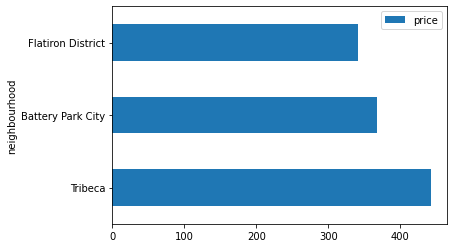

In [ ]:
manhattan_top_three.plot(x='neighbourhood',y='price',kind='barh')

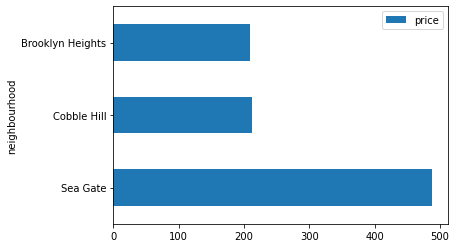

In [ ]:
brooklyn_top_three.plot(x='neighbourhood',y='price',kind='barh')


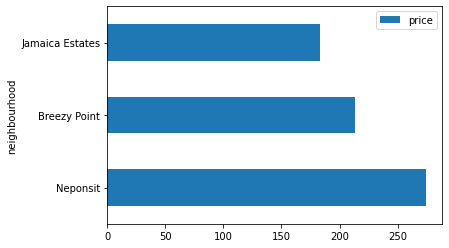

In [ ]:
queens_top_three.plot(x='neighbourhood',y='price',kind='barh')

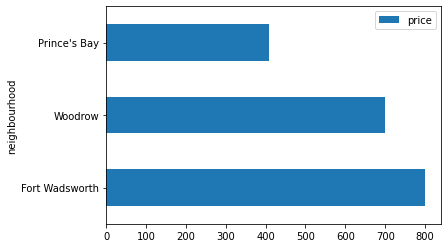

In [ ]:
staten_island_top_three.plot(x='neighbourhood',y='price',kind='barh')

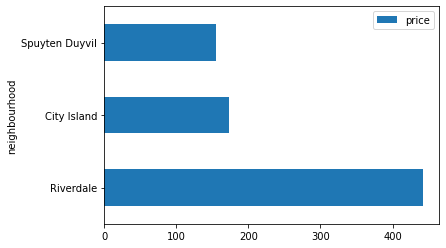

In [ ]:
bronx_top_three.plot(x='neighbourhood',y='price',kind='barh')

In [ ]:
most_preferred_room_type=new_df.groupby('room_type')['number_of_reviews'].mean().reset_index()


In [ ]:
most_preferred_room_type

,room_type,number_of_reviews
0,Entire home/apt,22.842418
1,Private room,24.112962
2,Shared room,16.600000


We have already talked about this earlier,travellers in America prefer privacy and independence over anything else,this is the reason why private rooms and entire/home appts are the most preferred room type as evident from the graph below.

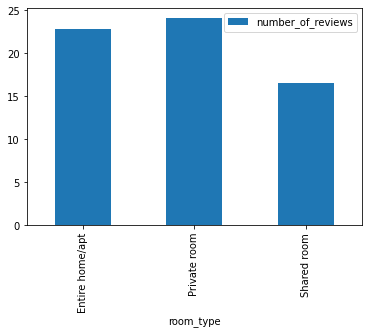

In [ ]:
x=most_preferred_room_type.room_type
y=most_preferred_room_type.number_of_reviews
most_preferred_room_type.plot(x='room_type',y='number_of_reviews',kind='bar')

In [ ]:
long_lat_df=new_df[['neighbourhood_group','longitude','latitude']]

In [ ]:
# Observing Room type and its corresponding price
room_type_price_df=new_df.groupby('room_type')['price'].mean().reset_index()


It is observed that an entire home/apt is the most expensive AirBNB whereas shared room is the cheapest.

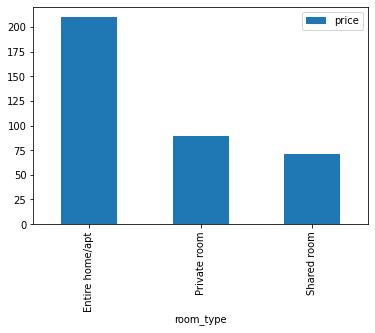

In [ ]:
room_type_price_df.plot(x='room_type',y='price',kind='bar')

Let's make use of some latitude and longitude data ,to plot the neighbourhood groups and see how far are they from each other.


In [ ]:
long_lat_df

,neighbourhood_group,longitude,latitude
0,Brooklyn,-73.97237,40.64749
1,Manhattan,-73.98377,40.75362
2,Manhattan,-73.94190,40.80902
3,Brooklyn,-73.95976,40.68514
4,Manhattan,-73.94399,40.79851
...,...,...,...
48890,Brooklyn,-73.94995,40.67853
48891,Brooklyn,-73.93317,40.70184
48892,Manhattan,-73.94867,40.81475
48893,Manhattan,-73.99112,40.75751


What a beautiful plot!

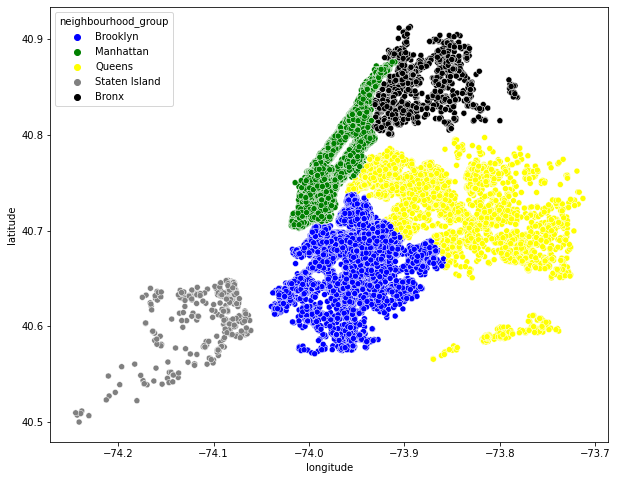

In [ ]:
#The following scatter plot shows density of Air BNB's in various neighbourhood groups.
plt.figure(figsize=(10,8))
ng =sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['blue','green','yellow','grey','black'], legend='full',data=long_lat_df)

So here we are at the end of our journey.
As promised we have to give some advice to the CEO of AirBNB.

Mr CEO,

*   


After analyzing some of the data regarding your AirBNB' in New York City
I came to some conclusions, which are as follows:


1.   Manhattan continues to be the most expensive neighbourhood.
2.   Queens is the most affordable and the cheapest neighbourhood.
3.   People prefer private rooms the most out of all the three room types.
4.   Entire home/apt room type is the most expensive of all the three room types
5.   AirBNB's with more reviews tend be more affordable then average.


Our suggestions to you would be:

Manhattan because of its exorbitant priced AirBNB's receives very less footfall
(number of reviews per month)therefore the revene for Manhattan AirBNB's is low.
We would adivise you to moderate these prices so that Manhattan Air BNB's could acheive their potential.

The cost of running those Manhattan Air BNB's and their prices are to be optimized in such a way they you are are able to maximize the revenues on them.

I hope our advise could be of some help to you.

See you soon!
Till then,take care & Bye!

Your's
Naveen Nahar An upcoming Scientist- A Data Scientist)

 